# DSCI 619 Deep Learning
# Week 2: Perform Classification Using Deep Learning



# Project of Seoul Bike Sharing Demand Using PyTorch

Let’s look at a real-world project of classification using TensorFlow. By performing this classification model, we will learn more new topics in deep learning.

Our dataset is taken from UCI Machine Learning Repository (at https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

This dataset containing in SeoulBikeData.csv has the following features/predictors:

+ **Date** : year-month-day
+ **Hour** - Hour of he day
+ **Temperature**-Temperature in Celsius
+ **Humidity** - %
+ **Windspeed** - m/s
+ **Visibility** - 10m
+ **Dew point temperature** - Celsius
+ **Solar radiation** - MJ/m2
+ **Rainfall** - mm
+ **Snowfall** - cm
+ **Seasons** - Winter, Spring, Summer, Autumn
+ **Holiday** - Holiday/No holiday
+ **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

The corresponding label/target is:

+ **Rented Bike count** - Count of bikes rented at each hour

## Load and Clean the Data

First, we load the data into memory using pandas

In [1]:
import pandas as pd
df = pd.read_csv('SeoulBikeData.csv', encoding = "ISO-8859-1",sep = ',')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


It is always a good idea to check the data type for all columns.

In [2]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Next, let's check the missing values in the dataset.

In [3]:
df.isnull().sum(axis = 0)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing values in all columns. But there are several features are categorical variables. Let's look into it.

In [4]:
catFeatures = ['Seasons', 'Holiday', 'Functioning Day']
df[catFeatures].describe(include='all').loc['unique', :]

Seasons            4
Holiday            2
Functioning Day    2
Name: unique, dtype: object

## Convert Categorical Features to Numerical Features 

We notice that the following features/columns are not numerical variables that include float 64 and int64.
+ Date
+ Seasons
+ Holiday
+ Functioning Day 

They are all object data types. Deep learning can only handle numerical data. We need to convert them to the numerical data such as int64 or float64.

Seasons is our label/target, we need to conver it to numerical variable using the following codes:

In [5]:
df['Seasons'] = df['Seasons'].astype('category')
df.dtypes

Date                           object
Rented Bike Count               int64
Hour                            int64
Temperature(°C)               float64
Humidity(%)                     int64
Wind speed (m/s)              float64
Visibility (10m)                int64
Dew point temperature(°C)     float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Seasons                      category
Holiday                        object
Functioning Day                object
dtype: object

In [6]:
df['Seasons'] = df['Seasons'].cat.codes
df['Seasons'].unique()

array([3, 1, 2, 0], dtype=int8)

Holiday and Functioning Day are categorical variables that have only finite many cases. Let's convert them to numerical variables. We use get_dummies function by specifying drop_first = True to **reduce the redundant feature**.

Let's summarize  the unique values for all the categorical features/variables.

In [7]:
catFeatures = ['Holiday','Functioning Day']
factors = pd.get_dummies(df[catFeatures],drop_first=True)
factors.head()

,Holiday_No Holiday,Functioning Day_Yes
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


Next, we drop the original categorical variables, then concatenate the numerical features and dummy variables.


In [8]:
df = df.drop(catFeatures,axis=1)
df = pd.concat([df,factors],axis=1)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


## Perform Feature Engineering on Date Feature

The Date column is not a categorical variable. It is a DateTime format. Therefore, we need to convert it to datetime format in pandas.

In [9]:

df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [10]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                                int8
Holiday_No Holiday                    uint8
Functioning Day_Yes                   uint8
dtype: object

There may exist some seasonality in the data. Therefore, we want to extract the year, the month from the datetime feature.


In [11]:
#extract the year
df['year'] = df['Date'].dt.year
#extract the month
df['month'] = df['Date'].dt.month


We know that the bike rental may have some differences between weekdays and weekends. Let's extract the day of the week from the Date feature.

In [12]:

df['dayofweek']=df['Date'].dt.dayofweek
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday_No Holiday,Functioning Day_Yes,year,month,dayofweek
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,1,3


Next, we need to drop the Date column since we extract its year, month and day in terms of weekend or not.

In [13]:
df = df.drop('Date',axis=1)
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'year', 'month',
       'dayofweek'],
      dtype='object')

# Numerically Summarize the Data

Let's numerically summarize continuous variables in the dataset.

In [14]:
import numpy as np
#specify the continuous features
numerics =['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'dayofweek'
       ]
#summarize it
np.round(df[numerics].describe(), decimals=2)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),dayofweek
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,11.50,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08,3.02
std,645.00,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44,2.00
min,0.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00,0.00
25%,191.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00,1.00
50%,504.50,11.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00,3.00
75%,1065.25,17.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00,5.00
max,3556.00,23.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80,6.00


Let's look at the correlation between all these numerical features.

In [15]:
np.round(df[numerics].corr(), decimals=2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),dayofweek
Rented Bike Count,1.00,0.41,0.54,-0.20,0.12,0.20,0.38,0.26,-0.12,-0.14,-0.02
Hour,0.41,1.00,0.12,-0.24,0.29,0.10,0.00,0.15,0.01,-0.02,-0.00
Temperature(°C),0.54,0.12,1.00,0.16,-0.04,0.03,0.91,0.35,0.05,-0.22,-0.00
Humidity(%),-0.20,-0.24,0.16,1.00,-0.34,-0.54,0.54,-0.46,0.24,0.11,-0.02
Wind speed (m/s),0.12,0.29,-0.04,-0.34,1.00,0.17,-0.18,0.33,-0.02,-0.00,-0.03
Visibility (10m),0.20,0.10,0.03,-0.54,0.17,1.00,-0.18,0.15,-0.17,-0.12,0.03
Dew point temperature(°C),0.38,0.00,0.91,0.54,-0.18,-0.18,1.00,0.09,0.13,-0.15,-0.02
Solar Radiation (MJ/m2),0.26,0.15,0.35,-0.46,0.33,0.15,0.09,1.00,-0.07,-0.07,-0.00
Rainfall(mm),-0.12,0.01,0.05,0.24,-0.02,-0.17,0.13,-0.07,1.00,0.01,-0.01
Snowfall (cm),-0.14,-0.02,-0.22,0.11,-0.00,-0.12,-0.15,-0.07,0.01,1.00,-0.03


# Graphically Summarize the Data
Let's summarize the numerical features graphically.

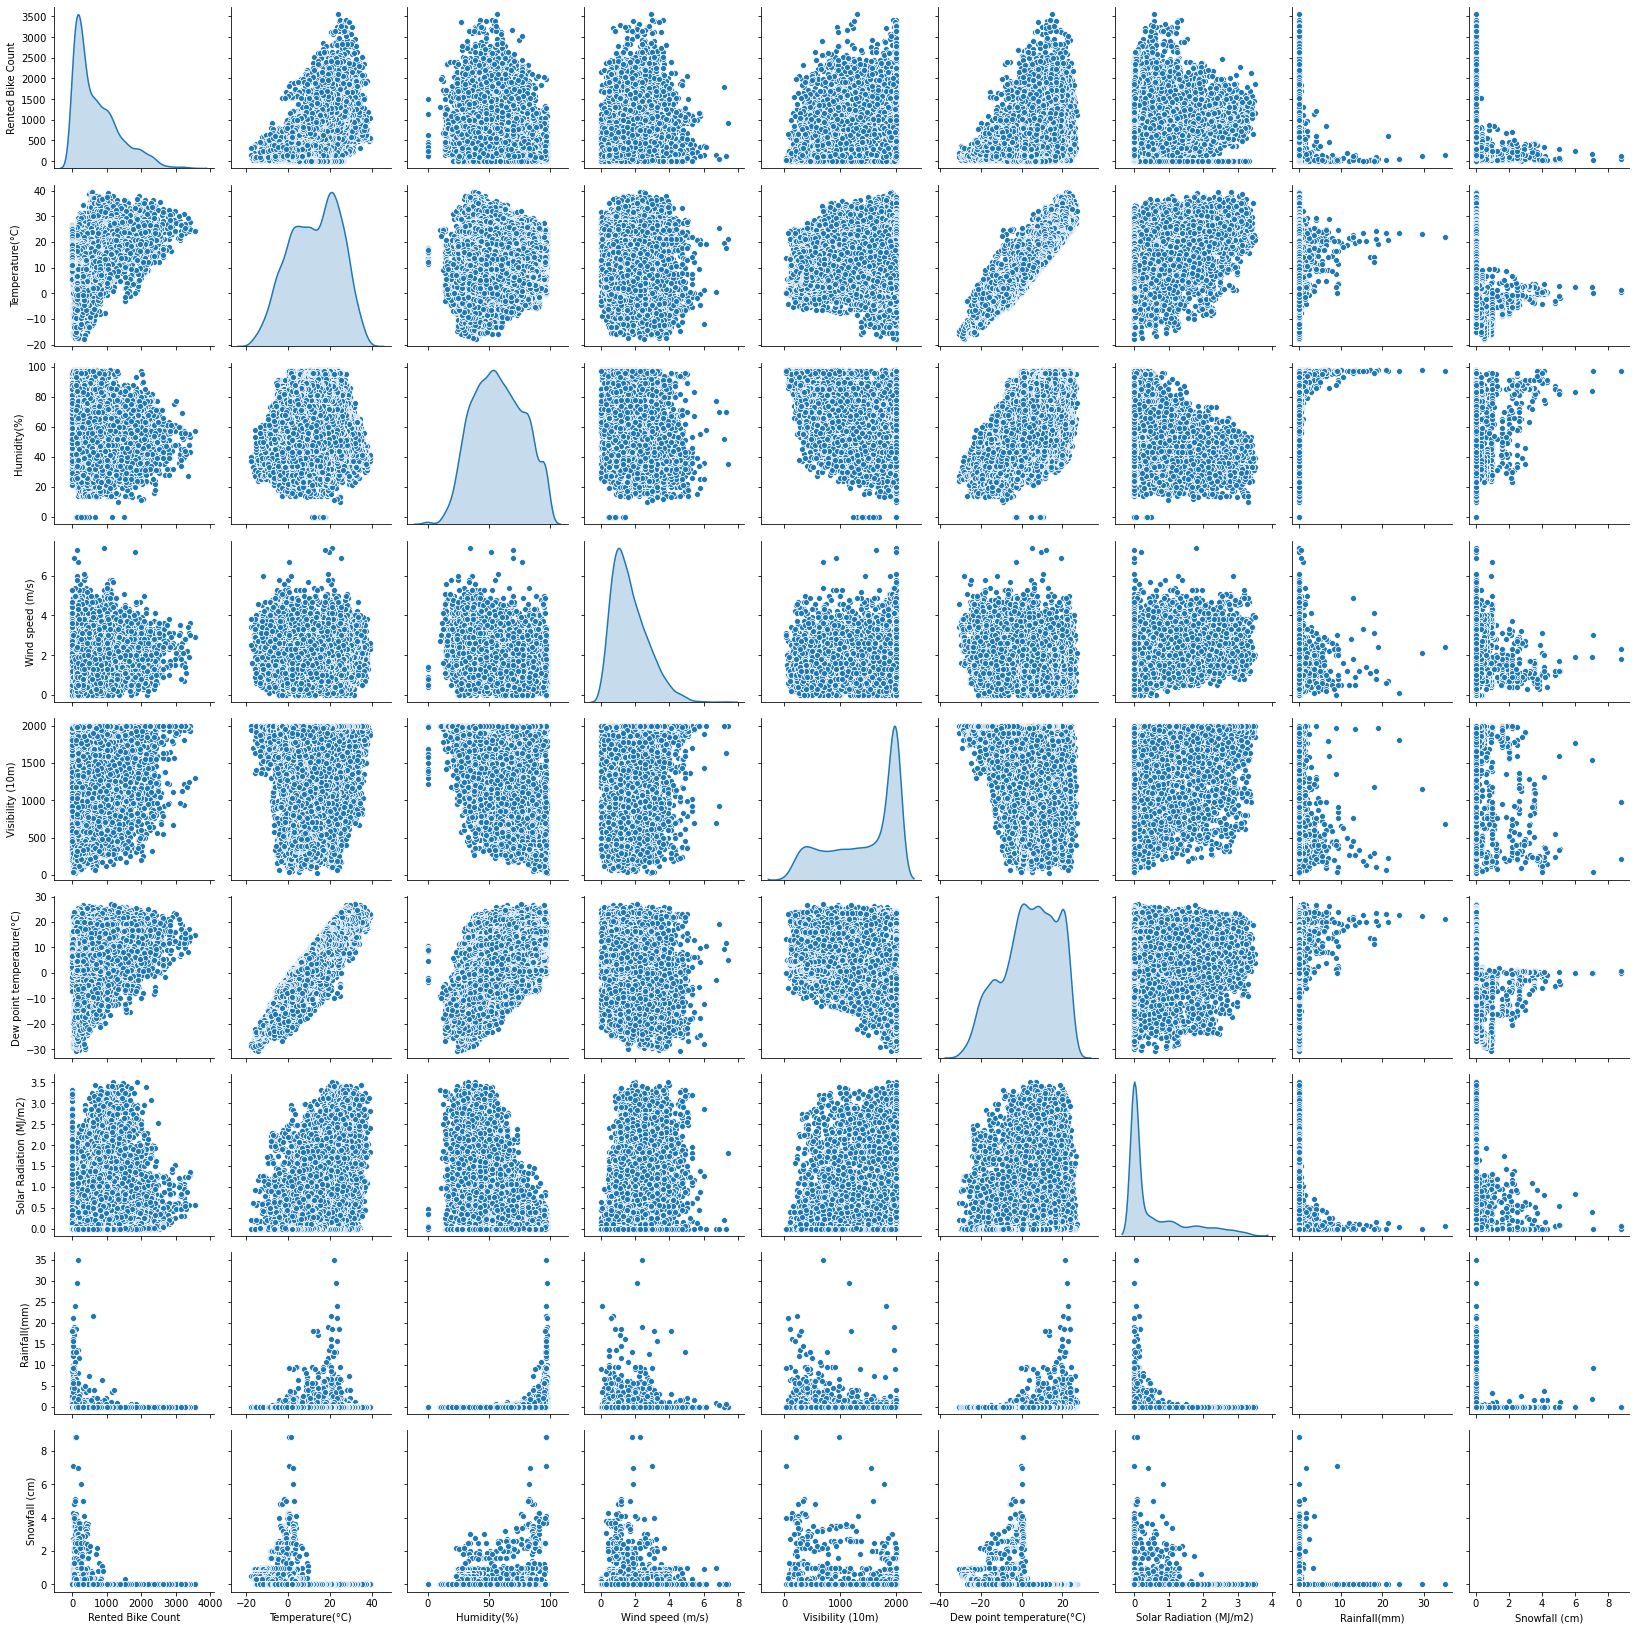

In [16]:
import seaborn as sns
#Pair plot continuous features
#Disable all warnings in Juyter notebook
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

sns.pairplot(df[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']], diag_kind='kde')

Let's box plot count against the hour.

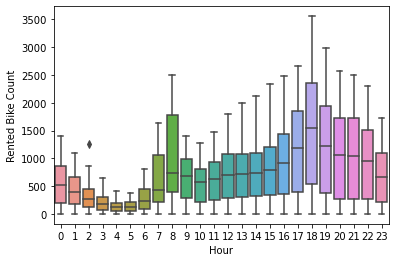

In [17]:

sns.boxplot(x='Hour',y='Rented Bike Count',data=df)

Let's box plot count against the month.

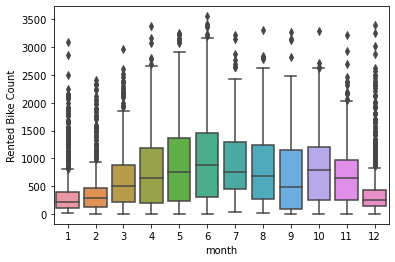

In [18]:
sns.boxplot(x='month',y='Rented Bike Count',data=df)

Let's box plot count against the day of week.

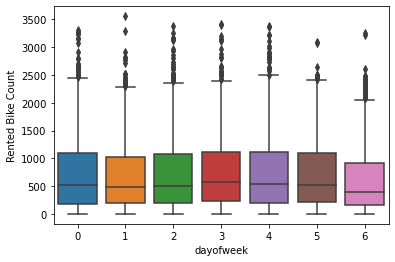

In [19]:
sns.boxplot(x='dayofweek',y='Rented Bike Count',data=df)

Let's box plot count against seasons.

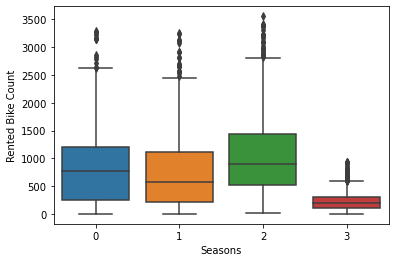

In [20]:
sns.boxplot(x='Seasons',y='Rented Bike Count',data=df)

## Split the Data Into Training and Test Data Set

We need first to combine all features into $X$ and select the label column as $y$.

In [21]:
# Obtain features and label
X = df.drop('Seasons',axis=1)
y = df['Seasons']

#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2021)

## Data Normalization for the Neural Networks

It is a good practice to normalize all features in deep learning.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Fit and transform the training data
X_train= scaler.fit_transform(X_train)
#Only transform the test data
X_test = scaler.transform(X_test)

## Create the Model

The loss function for the classification problem is based on log-likelihood.
+ Assume that there are $N$ cases in the label/target.
+ Let $p_i$ denote the probability of case $i$
+ Let $\hat{p_i}$ denote the model estimated of $p_i$

Define the cross entropy as 
$$- \sum_{i=1}^N \hat{p_i} \log(p_i)$$
Then the average of the log-likelihood is
$$ \frac{1}{N} \log \prod_{i=1}^N {p_i}^{N\hat{p_i}} = \sum_{i=1}^N \hat{p_i} \log(p_i)$$

By the equation above, we can see that Our goal is to maximize the loglikelihood for a classification problem, which is the same as minimizing the cross-entropy due to the negative sign.


There are two cases for classification:

+ Binary classification: The target/label has **only two cases** 
    + The loss function should be **'nn.BCELoss'**  or **nn.BCEWithLogitsLoss**
    + The **last layer/ouput layer must have ONE neuron with activation funciton sigmoid** to produce the probablity. 

   
+ Multiclass classification with the **label has at least 3 cases**. 
    + The loss function should be **'nn.CrossEntropyLoss'**
    + The **last layer/output layer must have the same number of neurons as the label with activation function softmax** to produce the probabilities for all the cases. 

  



Let's use the sequential model for this classification problem. Since **PyTorch works directly on Tensor data structure instead of the data frame or NumPy array**. We need to convert data frame or numpy array to PyTorch Tensor using torch.tensor function. (Please see https://pytorch.org/docs/stable/tensors.html)


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [24]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64))#.reshape(-1,1))

In [25]:
print(y_train.shape)
print(X_train.shape)

torch.Size([7008])
torch.Size([7008, 15])


Next, we need to get the number of features and target using codes instead of using magic numbers such as input_size = 15 and output_size =1.  We also specify the number of neurons for the first input layer.
Codes with magic numbers are hard to maintain and debug.

In [26]:
input_size = X_train.shape[1]
output_size = len(df['Seasons'].unique())
#specify the number of neuron for the hidden layers
hidden_size = [20, 10]
print(input_size)
print(output_size)

#convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64))


15
4


PyTorch can use object oriented programming in Python. We need to define a class of LinearClassificationModel that is derivated from torch.nn.Module. torch.nn.Module is the base class for all neural network moduels. Therefore LinearClassificationModel is the child class and torch.nn.Module is the parent class. Please visit the following website to get the definition of the base class
https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module

We need to define or overide the following two memeber funcitons:

+ Constructor/initializer : __init__ (double underscore before and after init. We use super() that helps us avoid referring to the base class explicitly.

+ Forward function: it defines the computation performed at every cell. All child classes should override it. We use the linear layer. It applies a linear transformation to the incoming data $y=wx+b$. The default linear layer has a bias term of $b$. The linear() means the network is a fully connected layer that is the same as the dense layer in TensorFlow.

We specify the neural network architecture.
Let's build a neuron network with the following layers:
+ First hidden layer with 20 neurons
+ Second hidden layer with 10 neurons
+ Output layer with **four** neuron since it is a classification problem with 4 unique values in the label

In [27]:
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.predict = torch.nn.Linear(hidden_size[1], output_size) 
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hidden1(x))  
        x = F.relu(self.hidden2(x))
        #x = F.relu(self.hidden3(x))
        y_pred = self.predict(x)            
        return y_pred

After we define our model class, we need to generate a model object

In [28]:
model = LinearClassificationModel(input_size, hidden_size,  output_size)

Next, we need to specify the loss function. Since the target/label is a factor with 4 different cases. It is a classification problem. The loss function is the cross entropy loss. 

In [29]:
l = nn.CrossEntropyLoss()

Next, we need to specify the optimization algorithm. We try the same algorithm as we did in TensorFlow. We set the learning rate to be 0.05.

In [30]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Next, we need to train our model. Unlike call fit() in TensorFlow, We need to write a loop explicitly. It performs the following tasks in the loop:

1. Forward pass: It predicts the target based on the input features.
2. Calculate the loss: It computes the loss/error based on the user-defined loss function.
3. Reset the gradients:  It sets the gradient to be zero
4. Backward pass: It computes the gradient of the loss for all the model's learnable parameters. 
5. Update the weights: It updates the weights using gradient descent

In [31]:
%%time

#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs
num_epochs = 500

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 500 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))


    

epoch 0, loss = 1.3999 and val_loss = 1.4012
Wall time: 1.97 s


In [32]:
print(y_pred.shape)
print(y_test.shape)

torch.Size([1752, 4])
torch.Size([1752])


Next, we save the training loss and validation loss in a data frame.

In [33]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

,train_loss,val_loss,epoch
495,1.368619,1.368922,495
496,1.368570,1.368870,496
497,1.368521,1.368821,497
498,1.368474,1.368772,498
499,1.368421,1.368721,499


Let's visualize the train and validation loss/error on the same plot.

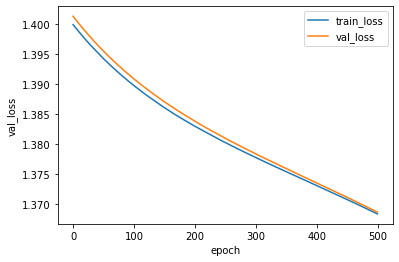

In [34]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

# Underfit and Overfit of the Deep Learning Algorithms

The deep learning model typically has many weights (parameters) to estimate. For example, a CNN model to cover in the later week may have several millions of parameters to estimate. Find the optimal weights in high-dimensional space is very challenging. The algorithm may trap in local minimum instead of the global minimum. It leads to the underfitting of the model.

+ The training loss may steadily decrease with a negative slope
+ The validation loss steadily decreases with a negative slope.

It means the loss function has the opportunity to improve. 
The above graphs show that both the training loss and Val loss decrease dramatically in the beginning. They continuously decrease with negative slopes. 

They can be improved by increasing the number of epochs or using a different number of layers or neurons.

In [35]:
%%time
from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs

num_epochs = 100000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)

        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 100000 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))


epoch 0, loss = 1.3684 and val_loss = 1.3687
Wall time: 6min 4s


In [36]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

,train_loss,val_loss,epoch
99995,0.268449,0.297744,99995
99996,0.268449,0.297732,99996
99997,0.268448,0.297736,99997
99998,0.268447,0.297730,99998
99999,0.268445,0.297740,99999


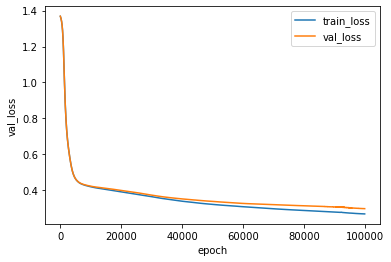

In [37]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])



By looking at the train and validation loss above, we find that it may underfit the data due to the following reasons.

+ The training loss  steadily decrease with a negative slope
+ The validation loss decrease with a small negative slope.


# Dropout to present Neural Networks from Overfitting

To address the overfitting in deep learning, Nitish Srivastava, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov proposed a smart solution by using dropout.

"Deep neural nets with a large number of parameters are very powerful machine learning
systems. However, overfitting is a serious problem in such networks. Large networks are also
slow to use, making it difficult to deal with overfitting by combining the predictions of many
different large neural nets at test time. Dropout is a technique for addressing this problem.
The key idea is to randomly drop units (along with their connections) from the neural
network during training. This prevents units from co-adapting too much. During training,
dropout samples from an exponential number of different “thinned” networks. At test time,
it is easy to approximate the effect of averaging the predictions of all these thinned networks
by simply using a single unthinned network that has smaller weights. This significantly
reduces overfitting and gives major improvements over other regularization methods. We
show that dropout improves the performance of neural networks on supervised learning
tasks in vision, speech recognition, document classification and computational biology,
obtaining state-of-the-art results on many benchmark data sets."

Source: Dropout: A Simple Way to Prevent Neural Networks from
Overfitting (https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

The dropout can be summarized in the following graph taken from the paper above:

<img src="dropout.jpg">

They also proposed the following practical guide for training dropout neural networks in their paper:
+ **Network Size**: Due to the dropout rate of $p$, if there are $n$ neurons in a given layer, then only $np$ neurons  will keep in the networks after dropout. "Therefore, if an n-sized layer is optimal for a standard neural net on any given task, a good dropout net should have at least $n/p$ units."
+ **Learning Rate and Momentum**: We should use a high learning rate such as 10-100 times the learning rate for a standard neural net without dropout and/or momentum around 0.95 to 0.99 to significantly improve the performance and speed of learning.
+ **Dropout Rate**: Typical dropout rates for hidden layers are in the range of 0.5 to 0.8. For input layers, the typical dropout rate is 0.8.


Let's add dropout and regularization on the weights in Tensorflow to address overfitting:

In [43]:
%%time
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size, droprate):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hiidden1_drop = nn.Dropout(droprate)
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.hiidden2_drop = nn.Dropout(droprate)
        self.predict = torch.nn.Linear(hidden_size[1], output_size) 
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hiidden1_drop(self.hidden1(x)))  
        x = F.relu(self.hiidden2_drop(self.hidden2(x)))  
        y_pred = self.predict(x)            
        return y_pred

# Create a classification model
droprate = 0.2
model = LinearClassificationModel(input_size, hidden_size,  output_size, droprate)

# Select the Cross Entropy Loss
l = nn.CrossEntropyLoss()

#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs
num_epochs = 1000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 100 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))


epoch 0, loss = 1.4185 and val_loss = 1.4111
epoch 100, loss = 1.4184 and val_loss = 1.4119
epoch 200, loss = 1.4184 and val_loss = 1.4119
epoch 300, loss = 1.4181 and val_loss = 1.4106
epoch 400, loss = 1.4184 and val_loss = 1.4107
epoch 500, loss = 1.4180 and val_loss = 1.4111
epoch 600, loss = 1.4184 and val_loss = 1.4119
epoch 700, loss = 1.4187 and val_loss = 1.4112
epoch 800, loss = 1.4188 and val_loss = 1.4133
epoch 900, loss = 1.4188 and val_loss = 1.4114
Wall time: 4.44 s


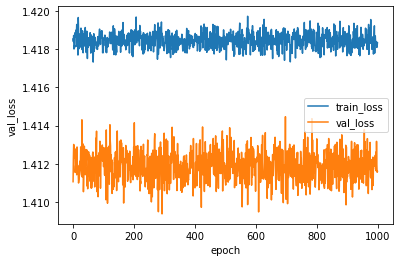

In [44]:

#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

# Evaluate the Model on the Test Data

Finally, let's evaluate the model. Since it is a classification problem, we can look at the following metrics:

+ Confusion matrix
+ Precision
+ Recall
+ F1-score
+ Accuracy

We  may use other metrics. Please consult the scikit-learn document. (see https://scikit-learn.org/stable/modules/model_evaluation.html)
We can choose the metrics based on the project. (Please see https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model(X_test).detach().numpy()
print(confusion_matrix(y_test,np.argmax(predictions, axis = 1)))

[[452   0   0   0]
 [432   0   0   0]
 [443   0   0   0]
 [425   0   0   0]]


In [46]:
print(classification_report(y_test,np.argmax(predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.26      1.00      0.41       452
           1       0.00      0.00      0.00       432
           2       0.00      0.00      0.00       443
           3       0.00      0.00      0.00       425

    accuracy                           0.26      1752
   macro avg       0.06      0.25      0.10      1752
weighted avg       0.07      0.26      0.11      1752



# Summary

+ We can perform feature engineering to improve the performance.
+ We need to check the neuron network fitting by plotting training loss and validation loss.
+ We know how to address the underfitting of the networks.
+ We are able to select the right loss function for binary classification problems.
+ We are able to choose the right loss function for multiclass classification problems.
+ We learn how to set up the output layer for the classifiation problem.
+ We can apply dropout in the networks to address overfitting.
+ We can specify the hyperparameter spaces before tuning.
+ We understand how to tune the hyperparameters.
+ WE learn how to choose the best model from the tuner.
+ We can apply the best model to create a forecast.

